# EDA

## IMPORTAR PAQUETES

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [65]:
ruta_proyecto = 'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'
ruta_proyecto

'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'

Nombres de los ficheros de datos.

In [66]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [67]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [68]:
cat.columns

Index(['empleo', 'antigüedad_empleo', 'ingresos_verificados', 'rating',
       'vivienda', 'descripcion', 'finalidad', 'num_cuotas', 'estado'],
      dtype='object')

In [69]:
# variables a analizar
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [70]:
# todas a la vez:
cat[variables].apply(lambda x: x.value_counts(normalize=True)).T.stack().reset_index()\
                .rename(columns={'level_0': 'Variable',
                                 'level_1': 'Valor',
                                 0: 'Frecuencia'
                }).sort_values(by = ['Variable','Frecuencia'])

,Variable,Valor,Frecuencia
9,antigüedad_empleo,9 years,0.035584
8,antigüedad_empleo,8 years,0.040998
7,antigüedad_empleo,7 years,0.041609
6,antigüedad_empleo,6 years,0.045578
4,antigüedad_empleo,4 years,0.060361
5,antigüedad_empleo,5 years,0.062251
11,antigüedad_empleo,desconocido,0.064804
0,antigüedad_empleo,1 year,0.065516
3,antigüedad_empleo,3 years,0.080521
10,antigüedad_empleo,< 1 year,0.084066


variable **"estado"** indica el estado del préstamo.

Es la que se usara para construir la **target** del modelo de clasificacion de la probabilidad del impago **(PD)**

### Análisis gráfico

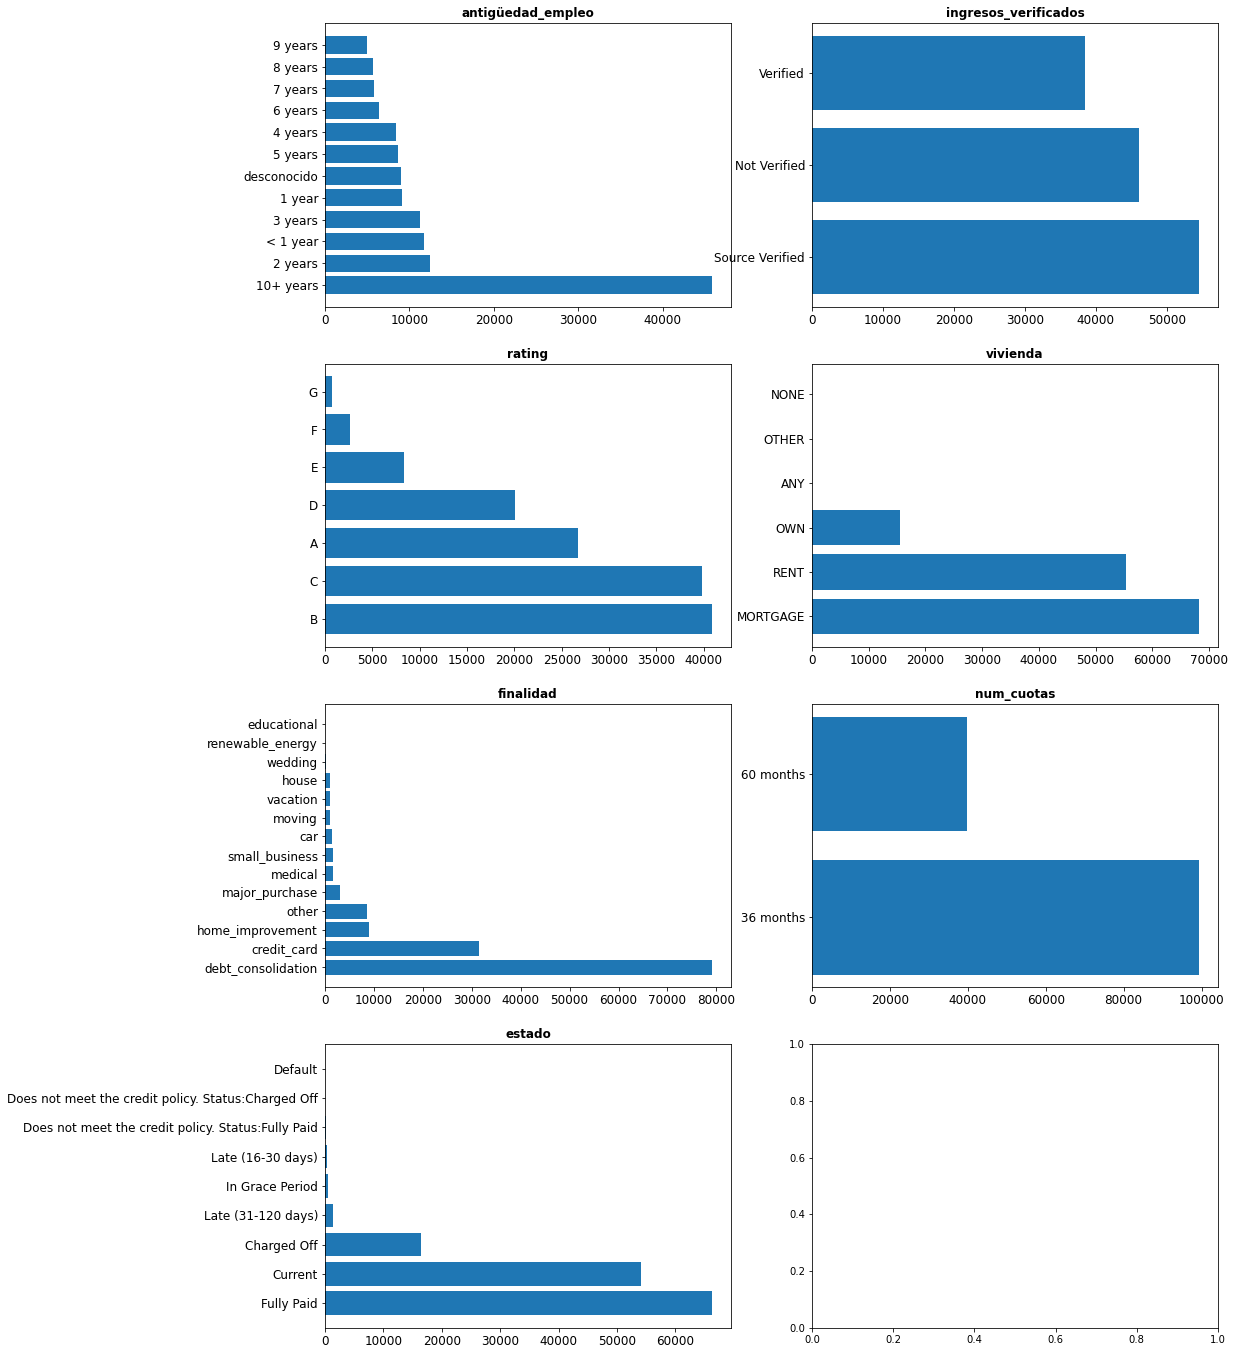

In [71]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil # redondeo hacia arriba
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Creamos bucle que va añadiendo gráficos
    for i in range(filas):
        for j in range(2):
            indexcolum = i*2+j
#             print('fila', i)
#             print('columna', j)
#             print('posicion variable:', indexcolum)
#             print('...................')
            if indexcolum < cat.shape[1]:
                variable = cat.columns[indexcolum]
                vars_analizar= cat[variable].value_counts()
                ax[i][j].barh(vars_analizar.index, vars_analizar)
                ax[i][j].set_title(variable, fontsize = 12, fontweight = "bold")
                ax[i][j].tick_params(labelsize = 12)

graficos_eda_categoricos(cat[variables])


Conclusiones:

En la fase de transformación:

* En **vivienda** podemos agrupar ANY, NONE y OTHER a la categoria mayoritaria (MORTGAGE)
* En **finalidad** se puede agrupar renewable_energy, educational y wedding en categoria 'otros'
* Crear la target a partir de estado

## EDA NUMÉRICAS

### Análisis estadístico

In [72]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    
    return(estadisticos)

In [73]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139081.0,75081.321764,65000.00,42186.961598,0.00,46000.00,65000.00,92000.00,300000.00
dti,139081.0,18.847592,17.84,14.082139,-1.00,11.96,17.84,24.48,999.00
num_hipotecas,139081.0,1.509401,1.00,1.883747,0.00,0.00,1.00,2.00,32.00
num_lineas_credito,139081.0,11.601117,11.00,5.624558,0.00,8.00,11.00,14.00,84.00
porc_tarjetas_75p,139081.0,41.008525,33.30,36.391302,0.00,0.00,33.30,66.70,100.00
porc_uso_revolving,139081.0,50.254319,50.20,24.682424,0.00,31.60,50.20,69.20,366.60
num_cancelaciones_12meses,139081.0,0.008484,0.00,0.102527,0.00,0.00,0.00,0.00,5.00
num_derogatorios,139081.0,0.198963,0.00,0.574330,0.00,0.00,0.00,0.00,46.00
num_meses_desde_ult_retraso,139081.0,16.781437,0.00,23.038902,0.00,0.00,0.00,30.00,195.00
principal,139081.0,14981.647026,12800.00,9137.222583,500.00,8000.00,12800.00,20000.00,40000.00


Ajustamos los valores de la variable dti entre 0 y 100

In [74]:
num.dti[num.dti>100] = 100 # colocar 100 en los mayores a 100
num.dti[num.dti<0] = 0 # colocar 0 en los menores a 0

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139081.0,75081.321764,65000.00,42186.961598,0.00,46000.00,65000.00,92000.00,300000.00
dti,139081.0,18.683748,17.84,9.692842,0.00,11.96,17.84,24.48,100.00
num_hipotecas,139081.0,1.509401,1.00,1.883747,0.00,0.00,1.00,2.00,32.00
num_lineas_credito,139081.0,11.601117,11.00,5.624558,0.00,8.00,11.00,14.00,84.00
porc_tarjetas_75p,139081.0,41.008525,33.30,36.391302,0.00,0.00,33.30,66.70,100.00
porc_uso_revolving,139081.0,50.254319,50.20,24.682424,0.00,31.60,50.20,69.20,366.60
num_cancelaciones_12meses,139081.0,0.008484,0.00,0.102527,0.00,0.00,0.00,0.00,5.00
num_derogatorios,139081.0,0.198963,0.00,0.574330,0.00,0.00,0.00,0.00,46.00
num_meses_desde_ult_retraso,139081.0,16.781437,0.00,23.038902,0.00,0.00,0.00,30.00,195.00
principal,139081.0,14981.647026,12800.00,9137.222583,500.00,8000.00,12800.00,20000.00,40000.00


### Análisis gráfico

In [75]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for indice, variable in enumerate(num):
#         ax[indice].hist(num[variable], bins = 1000, density=True)
        num[variable].plot.density(ax = ax[indice]) # usando .plot de pandas
        ax[indice].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[indice].tick_params(labelsize = 12)

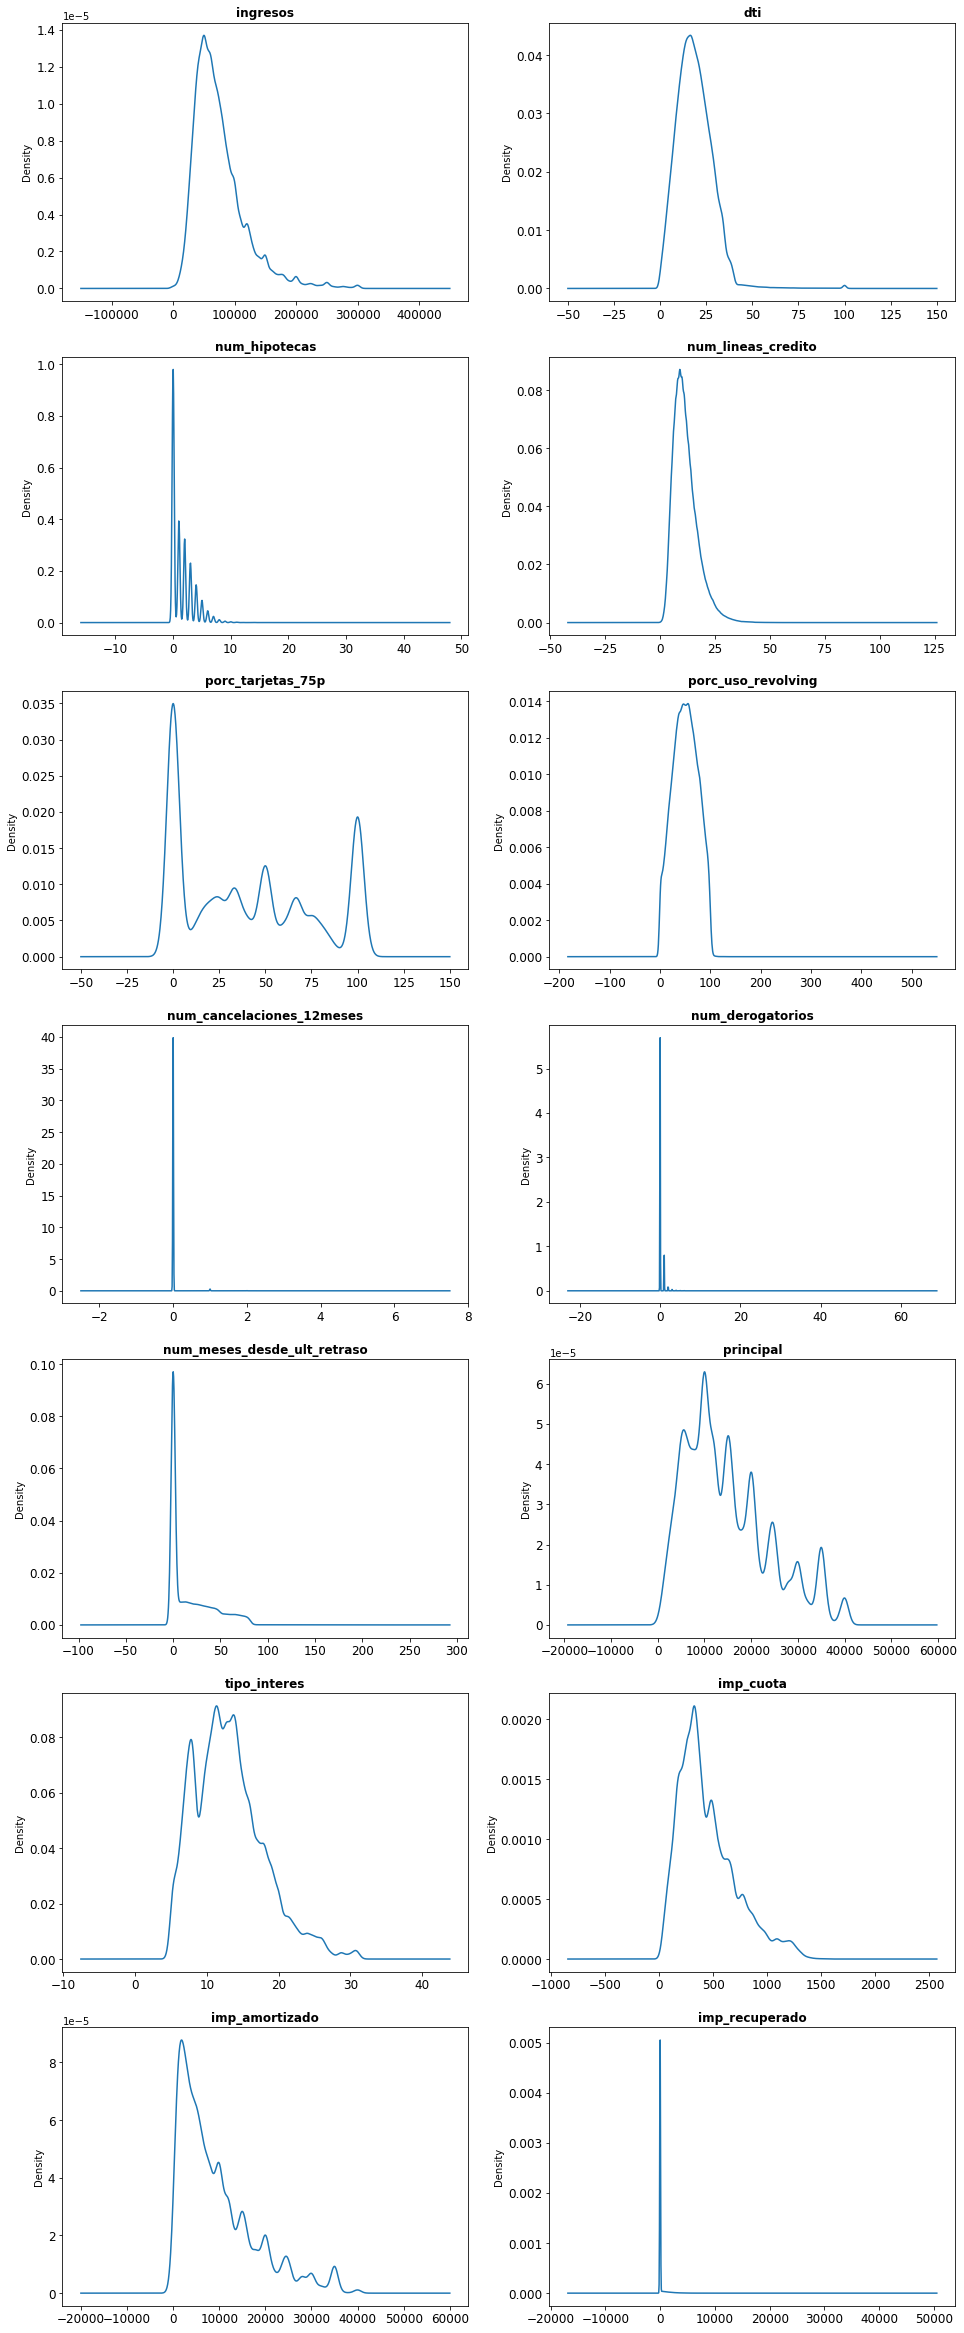

In [76]:
graficos_eda_continuas(num)

Analisis mas detallado de **imp_amortizado** e **imp_recuperado**, los cuales son relevantes para la **target** del modelo  **EDA** y **LGD** respectivamente

In [77]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [78]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [79]:
num.loc[:,['principal','imp_amortizado','imp_recuperado']]

,principal,imp_amortizado,imp_recuperado
id_cliente,,,
137387967,15000.0,2669.06,0.00
4798121,10000.0,6362.96,0.00
46641215,24000.0,24000.00,0.00
87998444,27000.0,12443.00,0.00
132883631,22000.0,22000.00,0.00
...,...,...,...
129396054,14400.0,1975.94,0.00
119242742,2500.0,996.06,0.00
121031962,10000.0,4388.51,0.00


In [80]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139081.0,14981.647026,9137.222583,500.0,8000.000000,12800.00000,20000.00,40000.000000
imp_amortizado,139081.0,9473.740525,8270.449857,0.0,3011.490000,7000.00000,13711.55,40000.000000
imp_recuperado,139081.0,143.755670,758.163770,0.0,0.000000,0.00000,0.00,33666.340000
r_amortizado_principal,139081.0,0.662655,0.368936,0.0,0.274855,0.86978,1.00,1.000032
r_recuperado_principal,139081.0,0.008915,0.040864,0.0,0.000000,0.00000,0.00,1.220774


Conclusiones:

* En la fase de transformación convertir num_derogatorios a binaria
* Revisar la relación entre estado e imp_recuperado

In [81]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1212.838075
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     381.413725
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

En los registros donde hay importe recuperado quiere decir explicitamente que hubo un impago

Efectivamente hay imp_recuperado en el estado **Charged Off**. 
Tambien en **Does not meet the credit policy. Status:Charged Off**

## GUARDAR DATASETS TRAS EDA

In [83]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [84]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)